In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats




In [2]:
df = pd.read_csv("Kolhapur.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WD50M,WS50M
0,2021,1,1,5,16.98,0.02,94.94,105.11,6.68
1,2021,1,1,6,16.95,0.02,96.50,105.04,6.68
2,2021,1,1,7,18.37,0.01,90.50,106.05,6.70
3,2021,1,1,8,20.83,0.00,78.75,106.00,6.97
4,2021,1,1,9,23.58,0.00,66.06,100.81,6.67
...,...,...,...,...,...,...,...,...,...
2155,2021,4,1,0,20.93,0.00,74.12,296.30,6.14
2156,2021,4,1,1,20.19,0.00,81.94,298.78,5.78
2157,2021,4,1,2,19.56,0.00,88.31,301.99,5.32
2158,2021,4,1,3,18.89,0.00,93.56,305.68,4.81


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
PRECTOTCORR    0.0
RH2M           0.0
WD50M          0.0
WS50M          0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'PRECTOTCORR', 'RH2M', 'WD50M', 'WS50M']


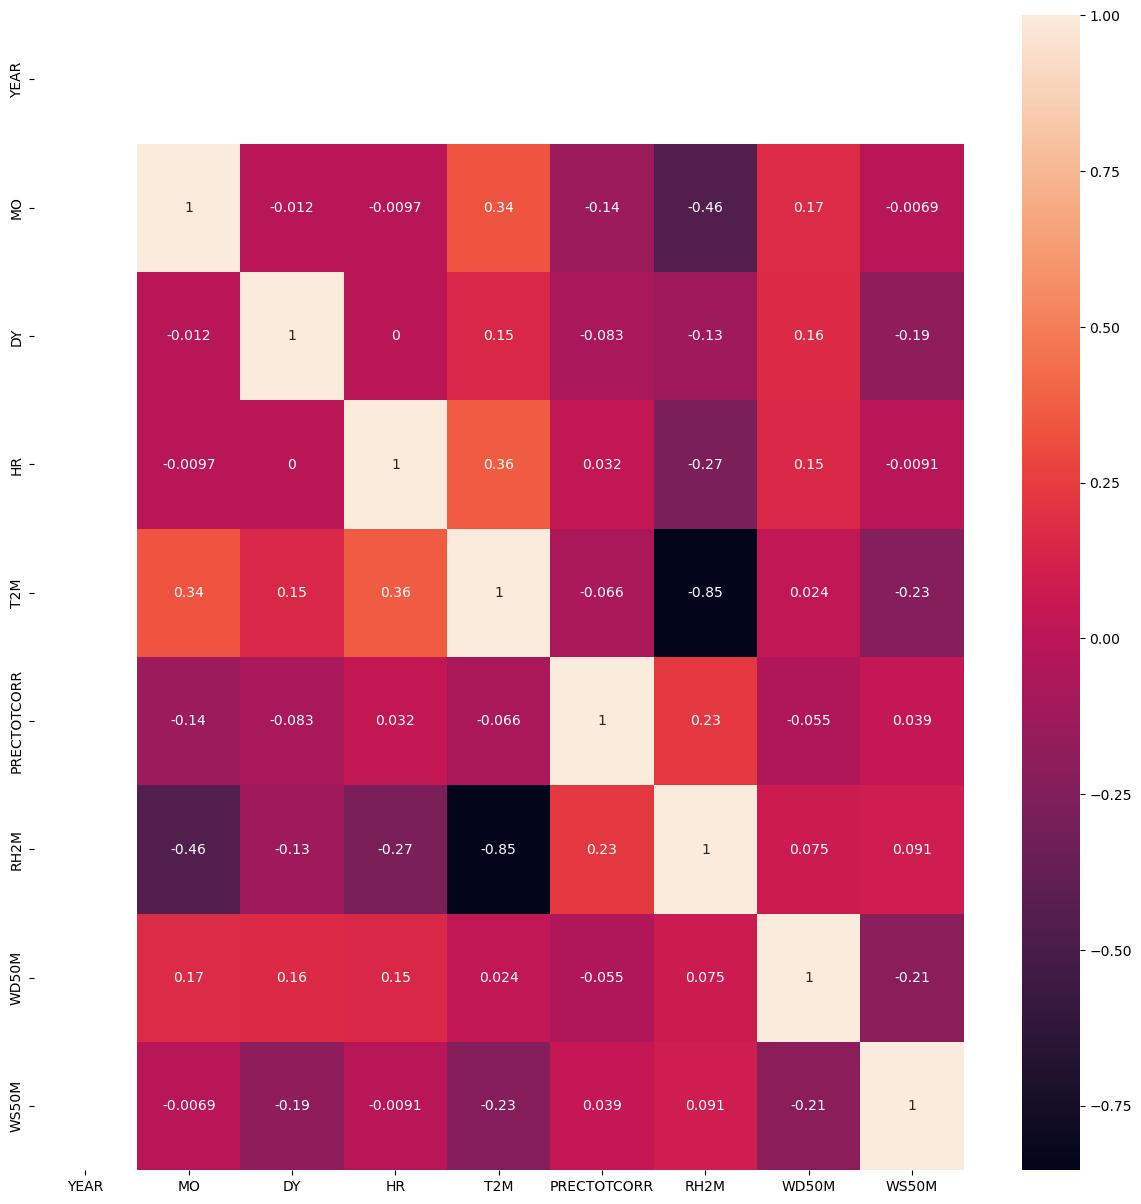

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

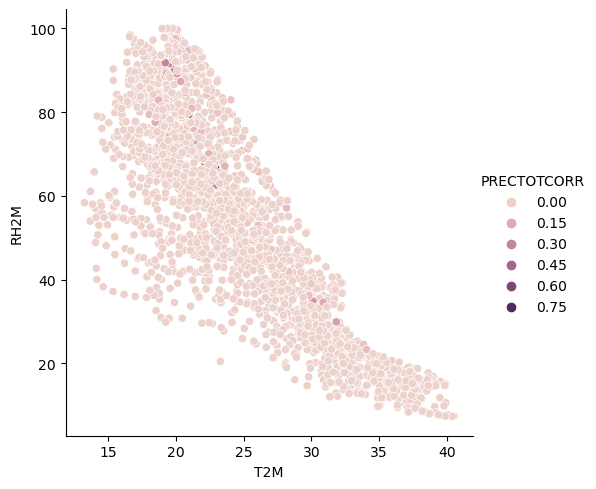

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


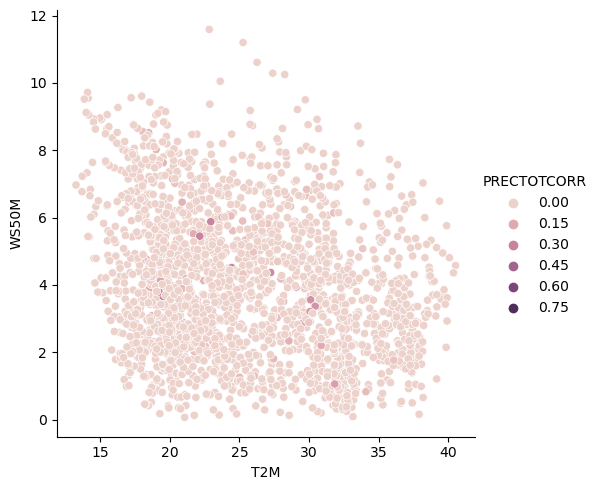

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


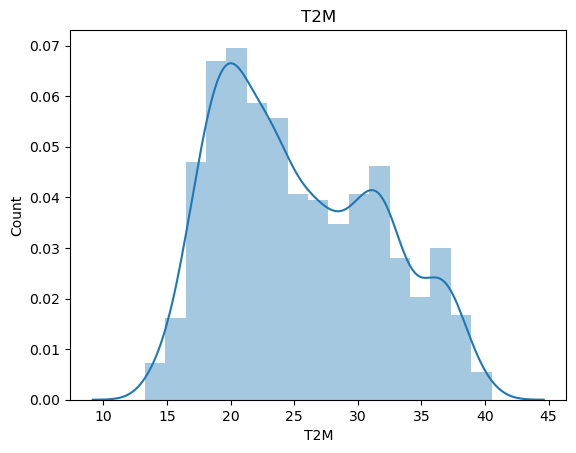

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


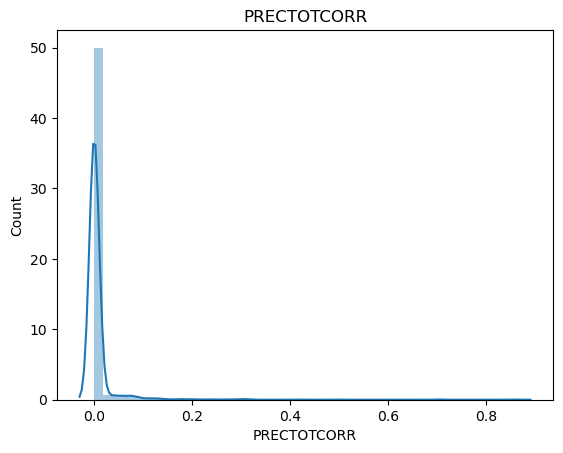

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


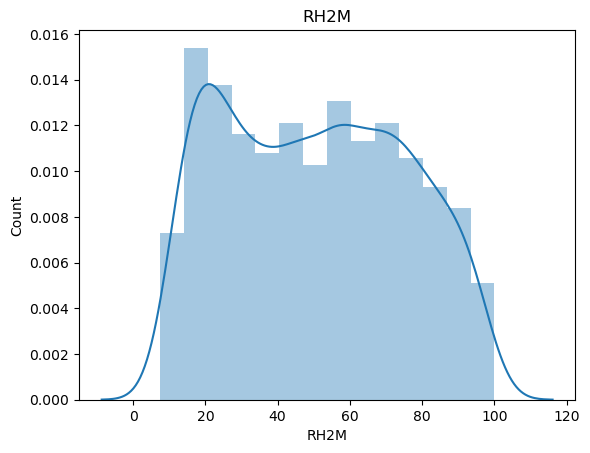

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


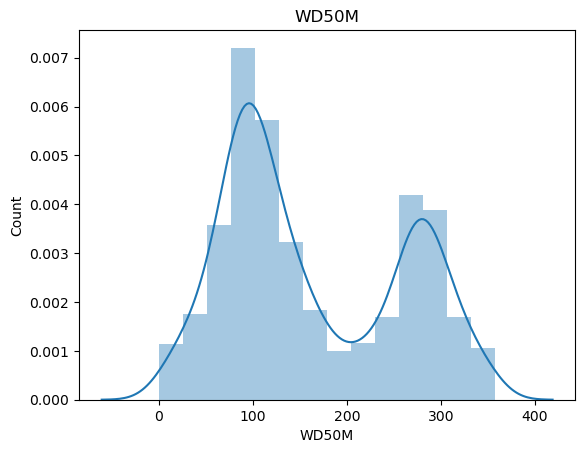

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


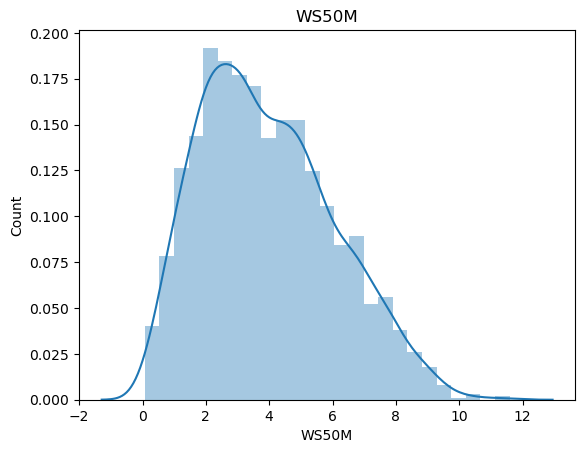

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

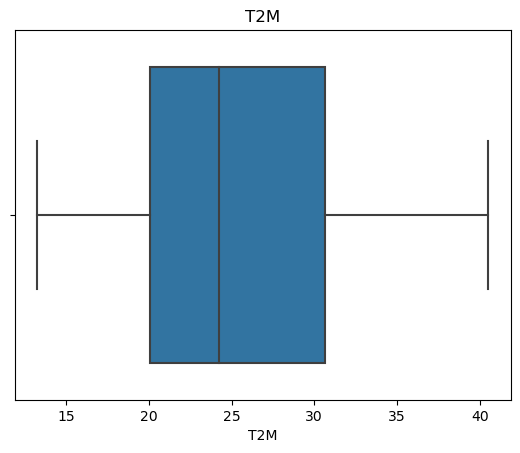

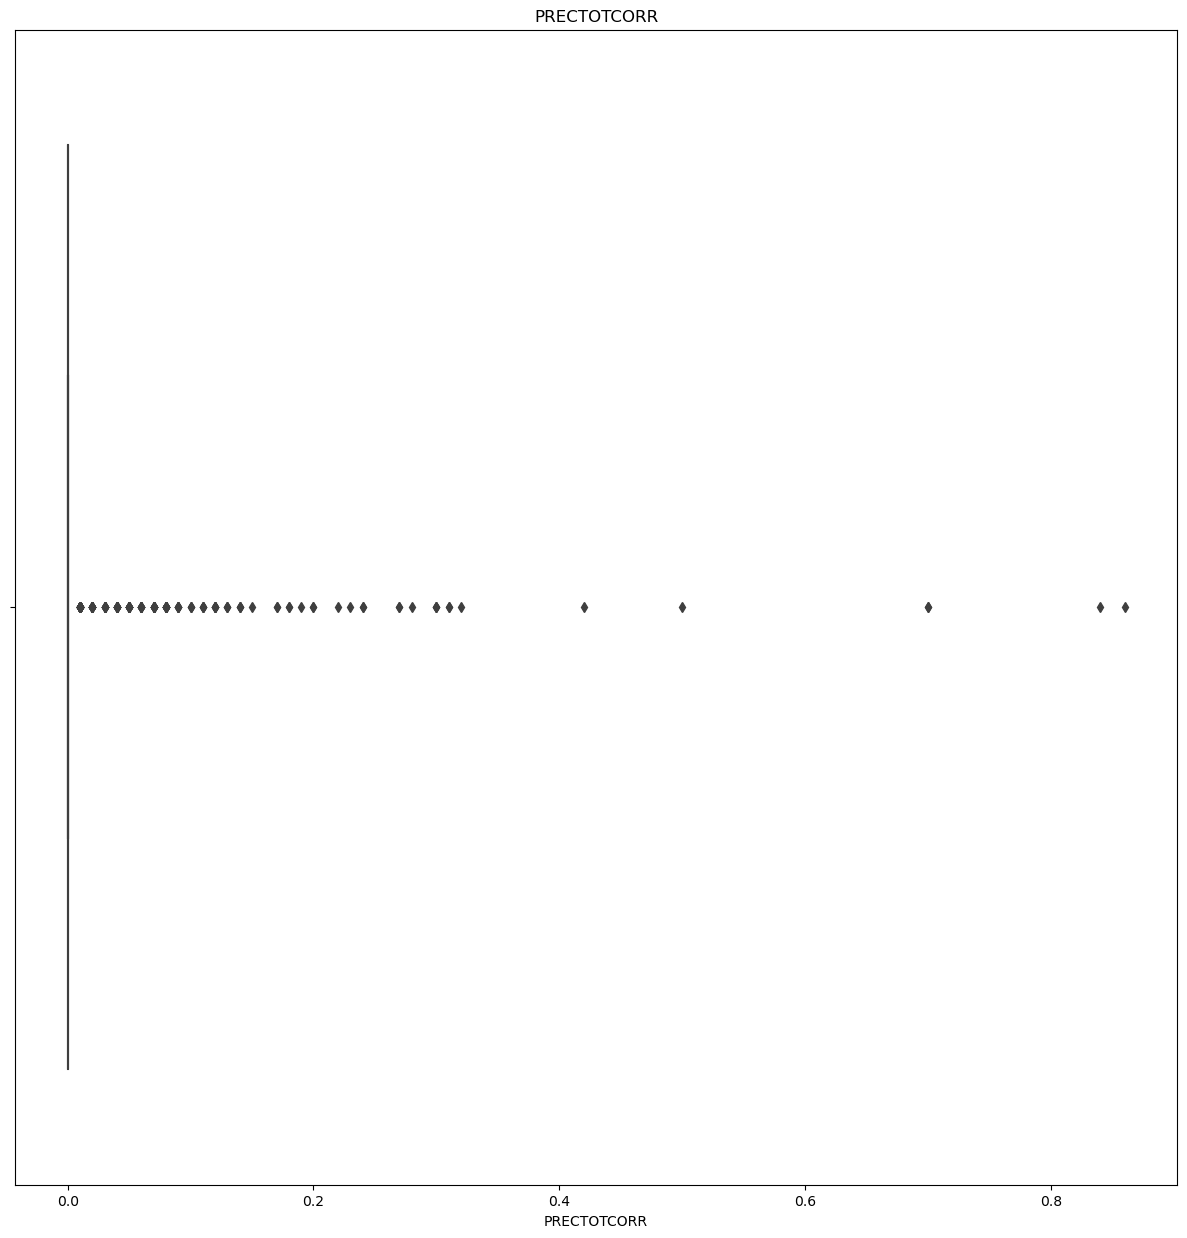

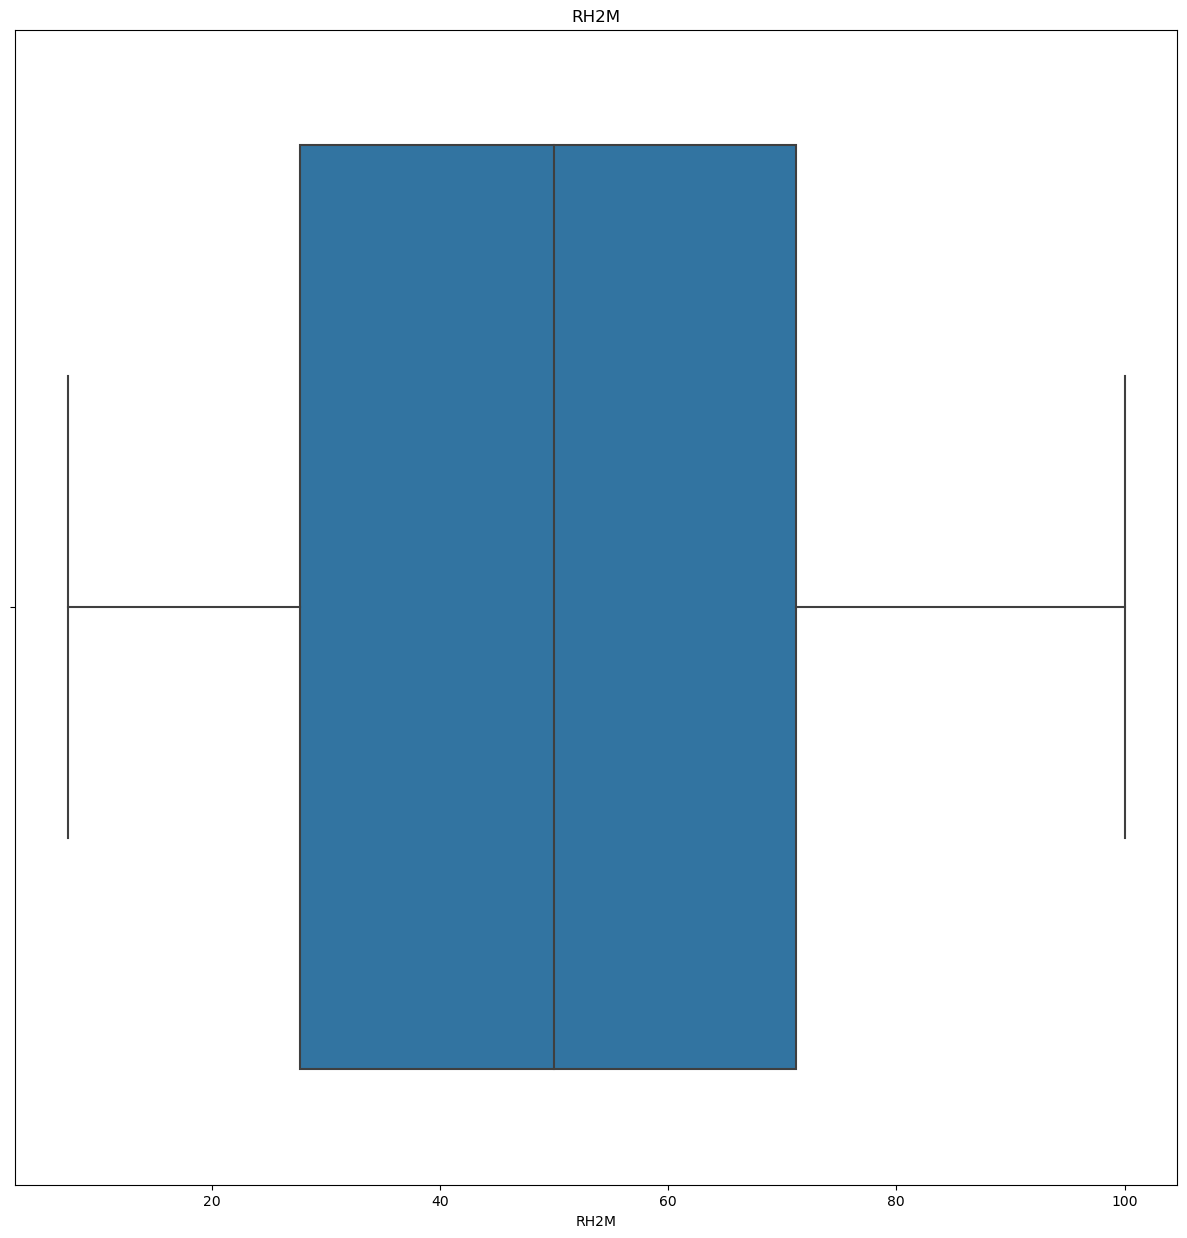

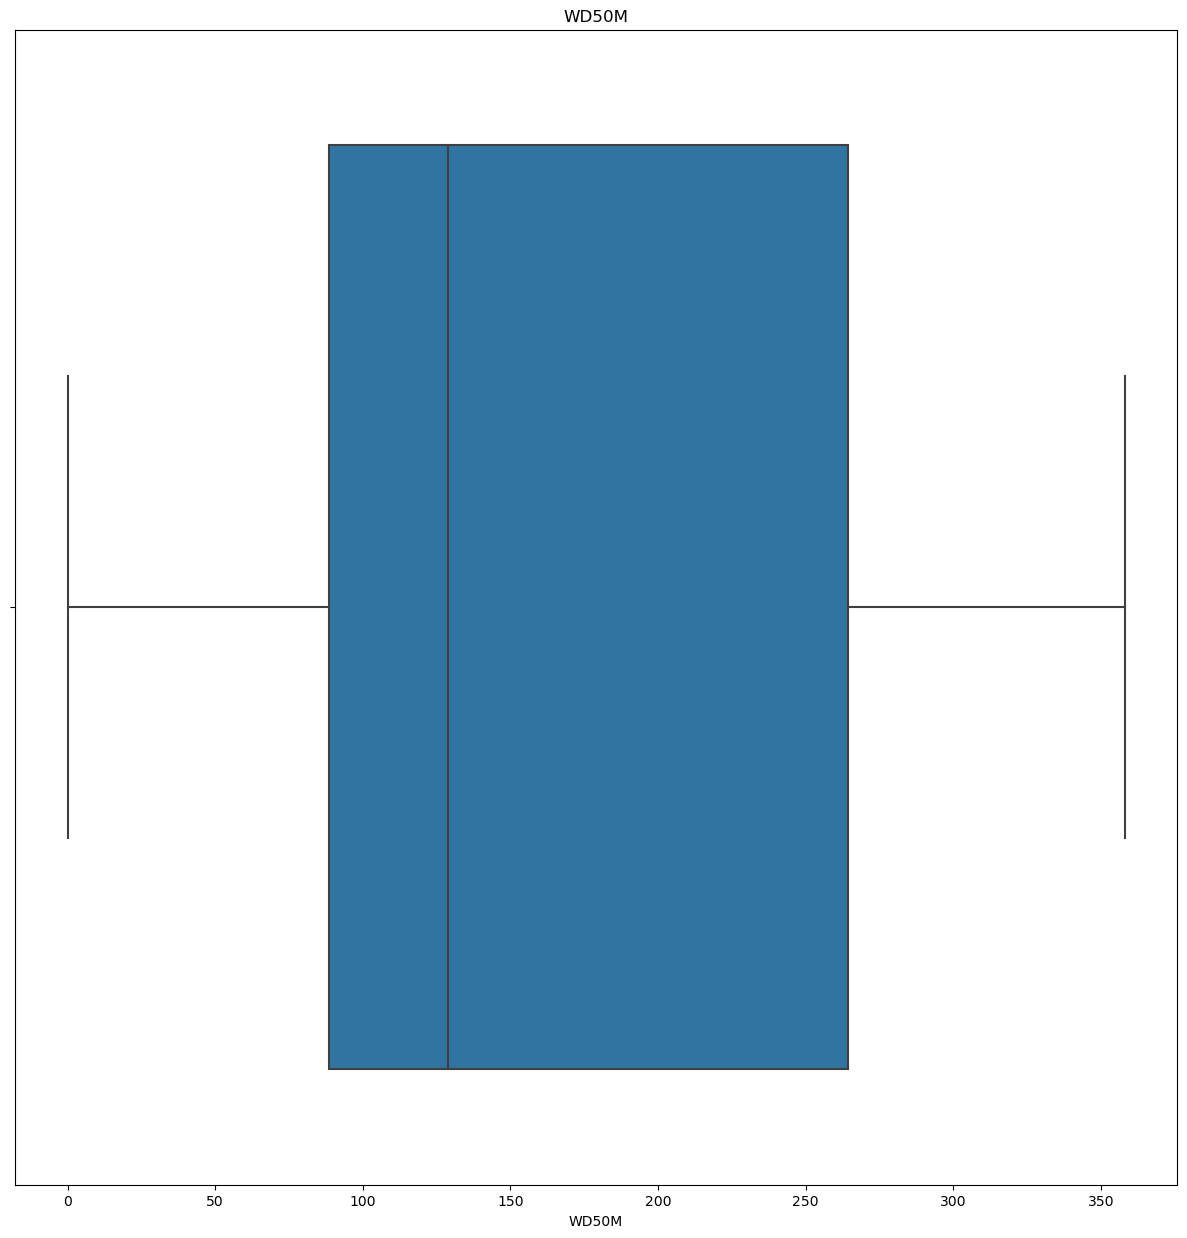

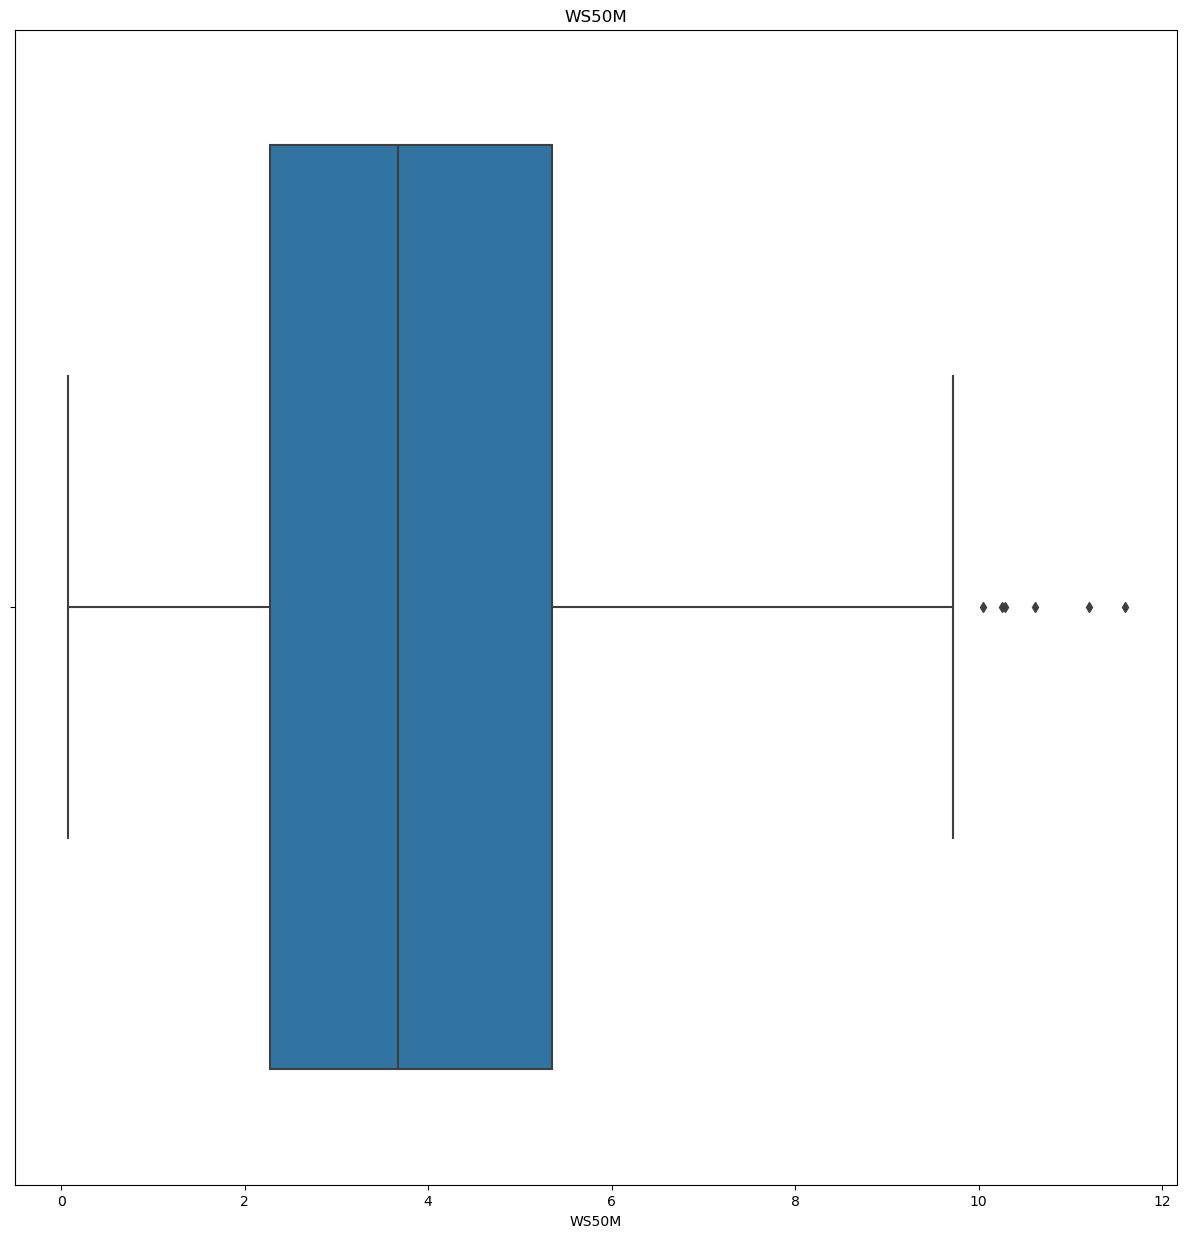

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[16.98 16.95 18.37 ... 23.01 18.89 18.32]
<class 'numpy.ndarray'>
[0.02 0.01 0.   0.05 0.04 0.06 0.18 0.42 0.7  0.86 0.84 0.5  0.32 0.2
 0.14 0.12 0.11 0.09 0.08 0.07 0.03 0.1  0.15 0.28 0.3  0.31 0.17 0.27
 0.24 0.23 0.22 0.13 0.19]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


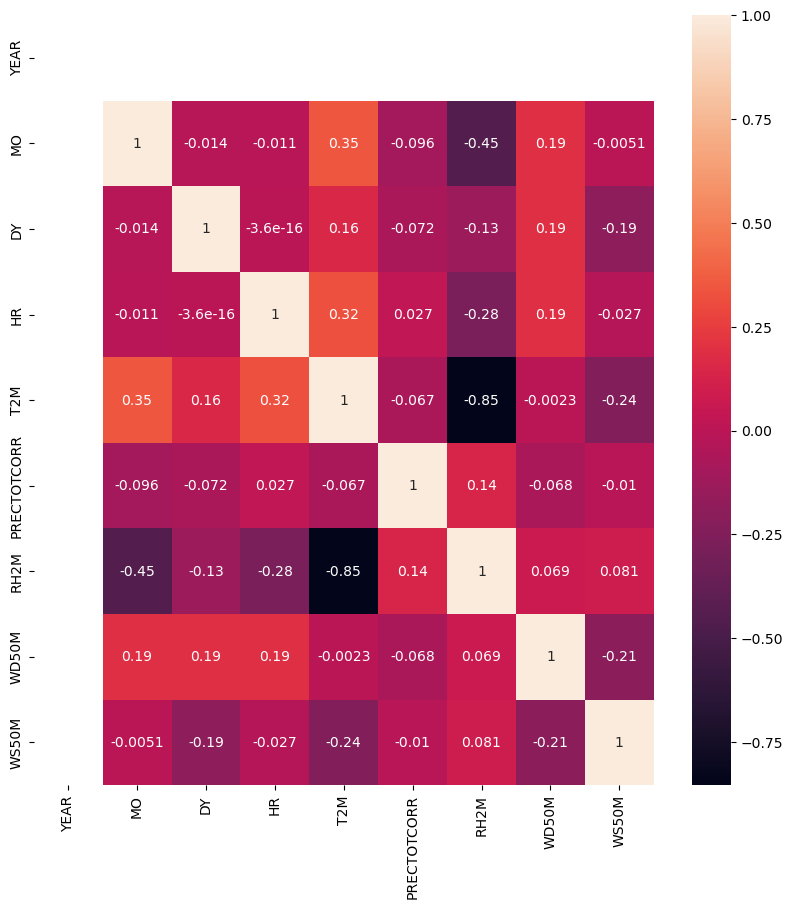

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


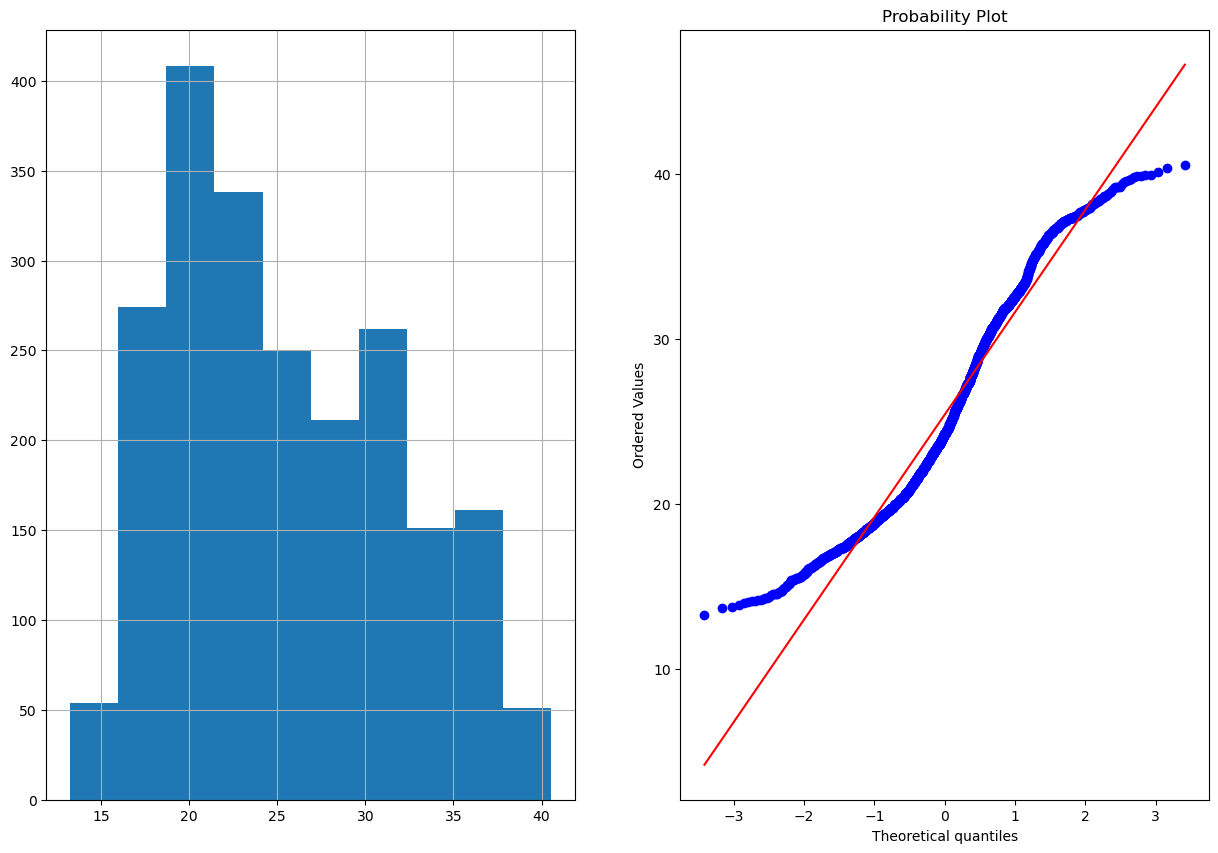

PRECTOTCORR


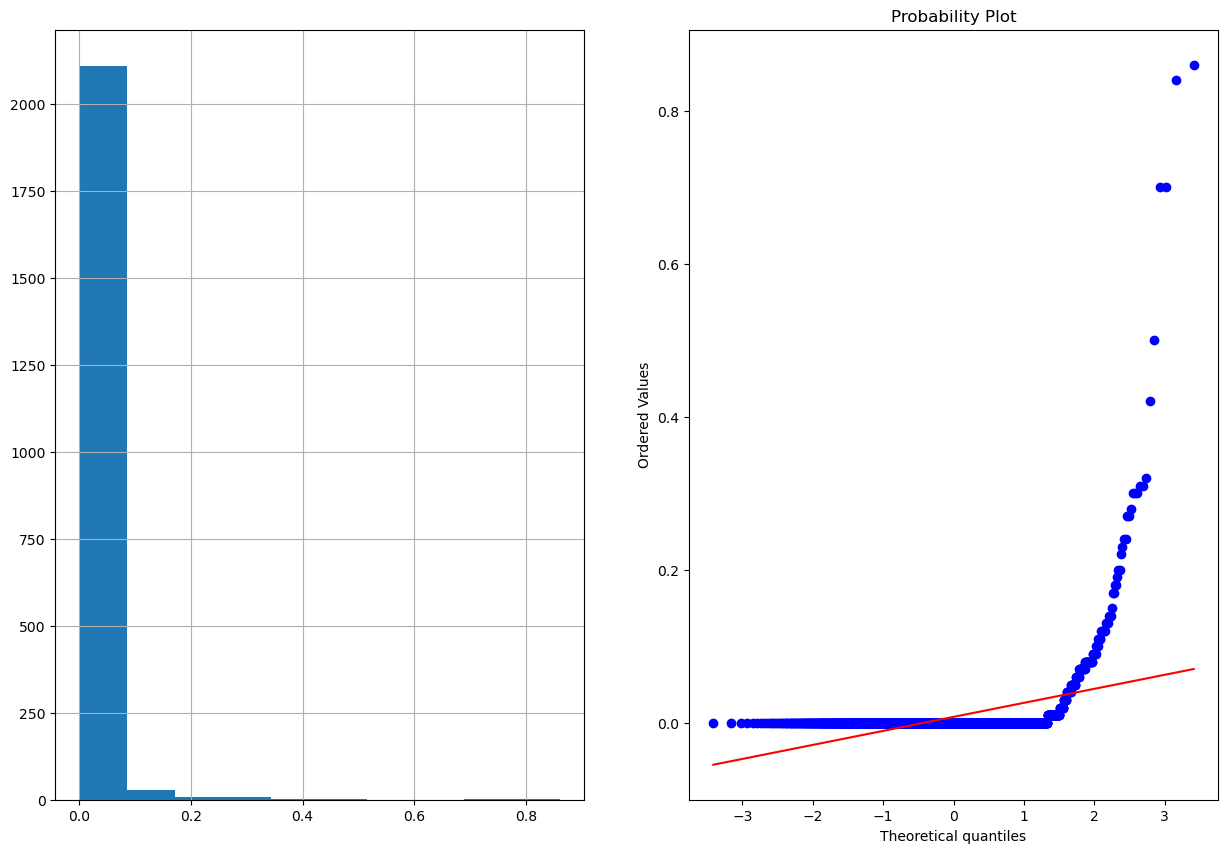

RH2M


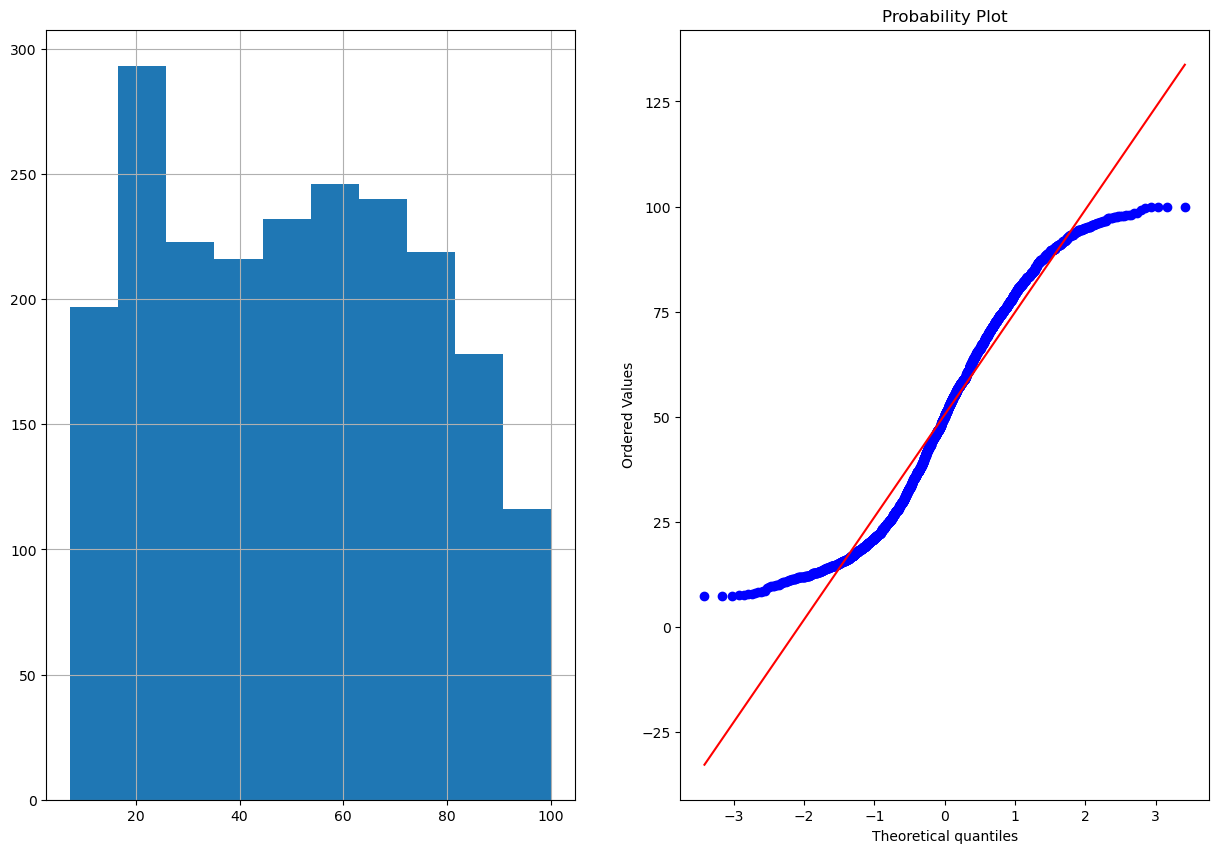

WD50M


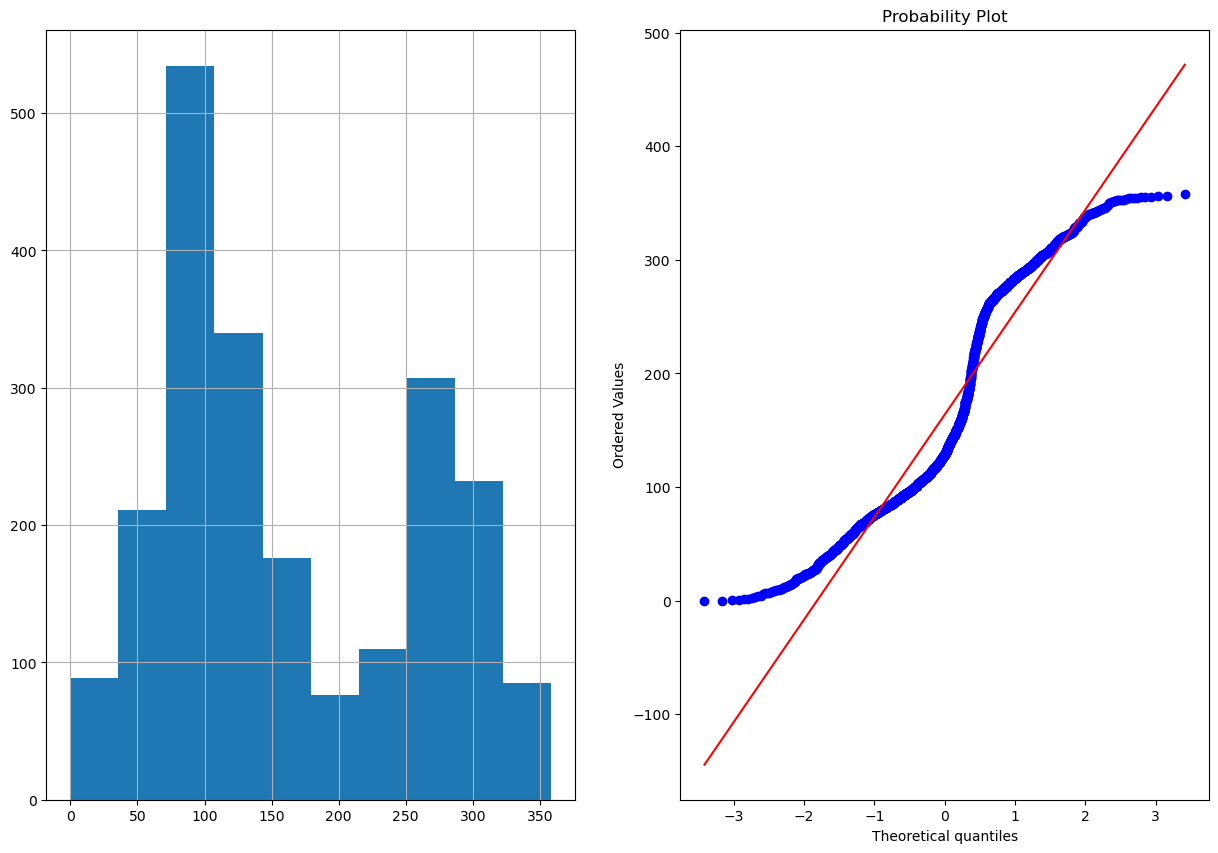

WS50M


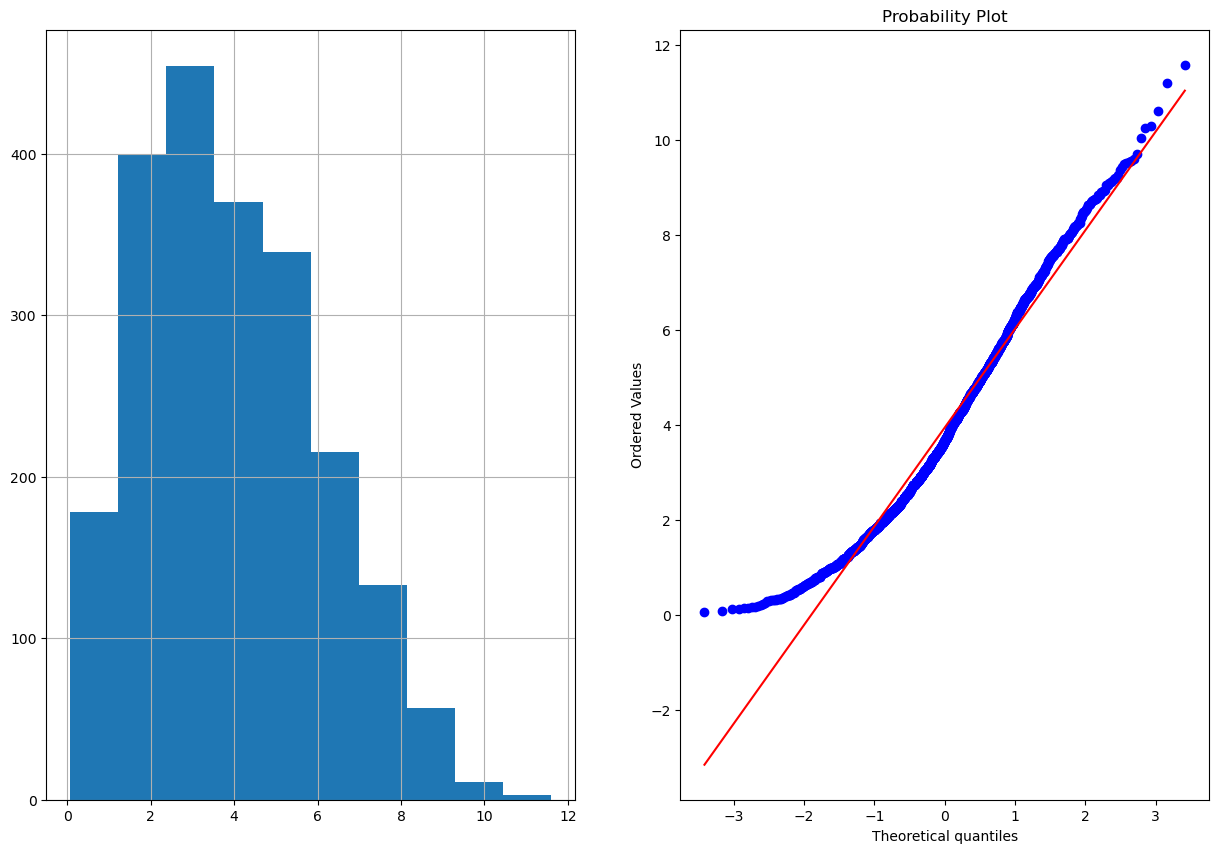

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.02, 0.01, 0.  , 0.05, 0.04, 0.06, 0.18, 0.42, 0.7 , 0.86, 0.84,
       0.5 , 0.32, 0.2 , 0.14, 0.12, 0.11, 0.09, 0.08, 0.07, 0.03, 0.1 ,
       0.15, 0.28, 0.3 , 0.31, 0.17, 0.27, 0.24, 0.23, 0.22, 0.13, 0.19])

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([0., 1.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,16.98,0.0
1,16.95,0.0
2,18.37,0.0
3,20.83,1.0
4,23.58,1.0
...,...,...
2155,20.93,1.0
2156,20.19,1.0
2157,19.56,1.0
2158,18.89,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,16.98,0.0,5
1,16.95,0.0,6
2,18.37,0.0,7
3,20.83,1.0,8
4,23.58,1.0,9
...,...,...,...
2155,20.93,1.0,0
2156,20.19,1.0,1
2157,19.56,1.0,2
2158,18.89,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,16.98,0.0,5,1
1,16.95,0.0,6,1
2,18.37,0.0,7,1
3,20.83,1.0,8,1
4,23.58,1.0,9,1
...,...,...,...,...
2155,20.93,1.0,0,1
2156,20.19,1.0,1,1
2157,19.56,1.0,2,1
2158,18.89,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,16.98,0.0,5,1,1
1,16.95,0.0,6,1,1
2,18.37,0.0,7,1,1
3,20.83,1.0,8,1,1
4,23.58,1.0,9,1,1
...,...,...,...,...,...
2155,20.93,1.0,0,1,4
2156,20.19,1.0,1,1,4
2157,19.56,1.0,2,1,4
2158,18.89,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,16.98,0.0,5,1,1,2021
1,16.95,0.0,6,1,1,2021
2,18.37,0.0,7,1,1,2021
3,20.83,1.0,8,1,1,2021
4,23.58,1.0,9,1,1,2021
...,...,...,...,...,...,...
2155,20.93,1.0,0,1,4,2021
2156,20.19,1.0,1,1,4,2021
2157,19.56,1.0,2,1,4,2021
2158,18.89,1.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,16.98,0.0,5,1,1,2021
1,16.95,0.0,6,1,1,2021
2,18.37,0.0,7,1,1,2021
3,20.83,1.0,8,1,1,2021
4,23.58,1.0,9,1,1,2021
...,...,...,...,...,...,...
2155,20.93,1.0,0,1,4,2021
2156,20.19,1.0,1,1,4,2021
2157,19.56,1.0,2,1,4,2021
2158,18.89,1.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([0., 1.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,16.98,0.0,5,1,1,2021,94.94
1,16.95,0.0,6,1,1,2021,96.50
2,18.37,0.0,7,1,1,2021,90.50
3,20.83,1.0,8,1,1,2021,78.75
4,23.58,1.0,9,1,1,2021,66.06
...,...,...,...,...,...,...,...
2155,20.93,1.0,0,1,4,2021,74.12
2156,20.19,1.0,1,1,4,2021,81.94
2157,19.56,1.0,2,1,4,2021,88.31
2158,18.89,1.0,3,1,4,2021,93.56


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,16.98,0.0,5,1,1,2021,94.94,6.68
1,16.95,0.0,6,1,1,2021,96.50,6.68
2,18.37,0.0,7,1,1,2021,90.50,6.70
3,20.83,1.0,8,1,1,2021,78.75,6.97
4,23.58,1.0,9,1,1,2021,66.06,6.67
...,...,...,...,...,...,...,...,...
2155,20.93,1.0,0,1,4,2021,74.12,6.14
2156,20.19,1.0,1,1,4,2021,81.94,5.78
2157,19.56,1.0,2,1,4,2021,88.31,5.32
2158,18.89,1.0,3,1,4,2021,93.56,4.81


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,16.98,0.0,5,1,1,2021,94.94,6.68,6.68
1,16.95,0.0,6,1,1,2021,96.50,6.68,6.68
2,18.37,0.0,7,1,1,2021,90.50,6.70,6.70
3,20.83,1.0,8,1,1,2021,78.75,6.97,6.97
4,23.58,1.0,9,1,1,2021,66.06,6.67,6.67
...,...,...,...,...,...,...,...,...,...
2155,20.93,1.0,0,1,4,2021,74.12,6.14,6.14
2156,20.19,1.0,1,1,4,2021,81.94,5.78,5.78
2157,19.56,1.0,2,1,4,2021,88.31,5.32,5.32
2158,18.89,1.0,3,1,4,2021,93.56,4.81,4.81


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

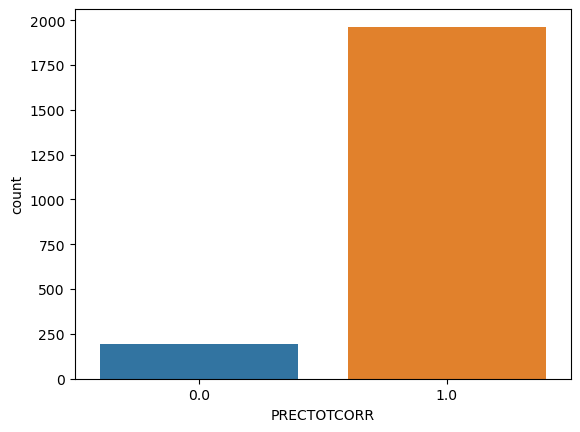

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("Kolhapur-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,16.98,0.0,5,1,1,2021,94.94,6.68,6.68
1,16.95,0.0,6,1,1,2021,96.50,6.68,6.68
2,18.37,0.0,7,1,1,2021,90.50,6.70,6.70
3,20.83,1.0,8,1,1,2021,78.75,6.97,6.97
4,23.58,1.0,9,1,1,2021,66.06,6.67,6.67
...,...,...,...,...,...,...,...,...,...
2155,20.93,1.0,0,1,4,2021,74.12,6.14,6.14
2156,20.19,1.0,1,1,4,2021,81.94,5.78,5.78
2157,19.56,1.0,2,1,4,2021,88.31,5.32,5.32
2158,18.89,1.0,3,1,4,2021,93.56,4.81,4.81
